<a href="https://colab.research.google.com/github/satani99/fastai_22_2/blob/main/matmul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

In [22]:
MNIST_URL = 'https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [23]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [24]:
!ls -l data

total 16656
-rw-r--r-- 1 root root 17051982 Jul  3 04:02 mnist.pkl.gz


In [25]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin')

In [26]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [27]:
def chunks(x, sz):
  for i in range(0, len(x), sz): yield x[i:i+sz]

In [28]:
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

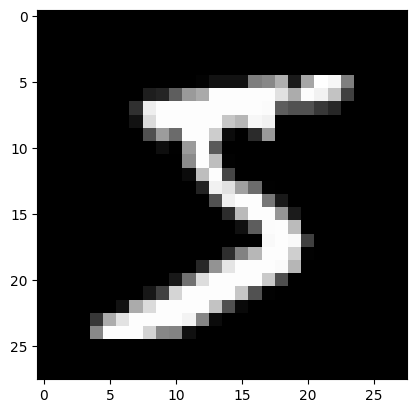

In [29]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));

In [30]:
from itertools import islice

In [31]:
it = iter(vals)
islice(it, 5)

In [32]:
list(islice(it, 5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [33]:
list(islice(it, 5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [34]:
list(islice(it, 5))

[]

In [35]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

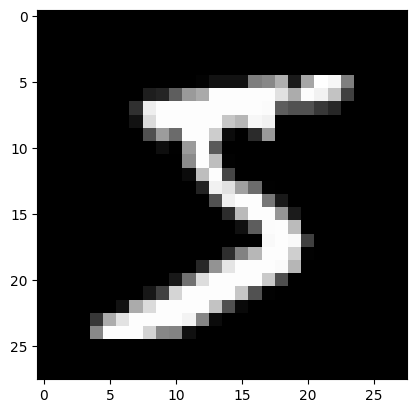

In [36]:
plt.imshow(img);

In [37]:
img[20][15]

0.98828125

In [38]:
class Matrix:
  def __init__(self, xs): self.xs = xs
  def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

In [39]:
m = Matrix(img)
m[20, 15]

0.98828125

In [40]:
import torch
from torch import tensor

In [41]:
tensor([1, 2, 3])

tensor([1, 2, 3])

In [42]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))

In [43]:
x_train.shape

torch.Size([50000, 784])

In [45]:
x_train.type()

'torch.FloatTensor'

In [46]:
imgs = x_train.reshape((-1, 28, 28))
imgs.shape

torch.Size([50000, 28, 28])

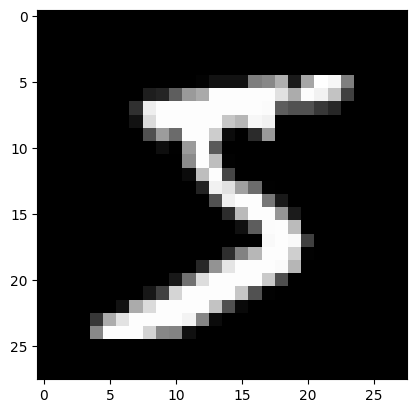

In [47]:
plt.imshow(imgs[0])

In [48]:
imgs[0, 20, 15]

tensor(0.9883)

In [49]:
n, c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [50]:
min(y_train), max(y_train)

(tensor(0), tensor(9))

In [51]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

In [52]:
rnd_state = None
def seed(a):
  global rnd_state
  a, x = divmod(a, 30268)
  a, y = divmod(a, 30306)
  a, z = divmod(a, 30322)
  rnd_state = int(x)+1, int(y)+1, int(z)+1

In [56]:
seed(457435656543)
rnd_state

(3548, 20460, 499)

In [57]:
def rand():
  global rnd_state
  x, y, z = rnd_state
  x = (171 * x) % 30269
  y = (172 * y) % 30307
  z = (170 * z) % 30323
  rnd_state = x, y, z
  return (x/30269 + y/30307 + z/30323) % 1.0

In [59]:
rand(), rand(), rand()

(0.9940199377171632, 0.3033184219283851, 0.08959233405995404)

In [61]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
  print(f'In child: {torch.rand(1)}')
  os._exit(os.EX_OK)

In parent: tensor([0.1899])
In child: tensor([0.1899])
